# Data Exploration Exercise
---


In [27]:
import pandas as pd
bli = pd.read_csv("../BLI2.csv")

---
### Task 1
Do men and women report the same degree of life satisfaction?


In [28]:
sorted( bli['Indicator'].unique() )

['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

There is a measure for 'Life satisfaction' so we can do a query to retrieve only these rows:

In [29]:
data = bli.query("Indicator == 'Life satisfaction'")
data.head()

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
1676,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1
1677,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2
1678,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8
1679,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0
1680,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9


You can see that the 'Inequality' contains 'Total' measures as well as measures for particular groups.

In [30]:
sorted( data['Inequality'].unique() )

['High', 'Low', 'Men', 'Total', 'Women']

Let's keep only the rows for 'Men' and 'Women'.

In [31]:
data = data.query("Inequality in ['Men','Women']")
data = data.sort_values('Country')  # to put rows from the same country together
data.head(10)

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
1714,AUS,Australia,SW_LIFS,Life satisfaction,Men,AVSCORE,7.1
1752,AUS,Australia,SW_LIFS,Life satisfaction,Women,AVSCORE,7.2
1715,AUT,Austria,SW_LIFS,Life satisfaction,Men,AVSCORE,7.1
1753,AUT,Austria,SW_LIFS,Life satisfaction,Women,AVSCORE,7.3
1754,BEL,Belgium,SW_LIFS,Life satisfaction,Women,AVSCORE,6.8
1716,BEL,Belgium,SW_LIFS,Life satisfaction,Men,AVSCORE,6.9
1782,BRA,Brazil,SW_LIFS,Life satisfaction,Women,AVSCORE,6.0
1744,BRA,Brazil,SW_LIFS,Life satisfaction,Men,AVSCORE,6.2
1755,CAN,Canada,SW_LIFS,Life satisfaction,Women,AVSCORE,7.0
1717,CAN,Canada,SW_LIFS,Life satisfaction,Men,AVSCORE,7.0


The numbers themselves are in the 'Value' column.

Thinking about the hypothesis test, to compare values for men and women we will need to prepare a paired sample. It makes sense to pivot to make two separate columns for the values:

In [32]:
reshaped = data.pivot(index='Country',columns='Inequality',values='Value')
reshaped.head()

Inequality,Men,Women
Country,,
Australia,7.1,7.2
Austria,7.1,7.3
Belgium,6.9,6.8
Brazil,6.2,6.0
Canada,7.0,7.0


We could visualise them on a histogram:

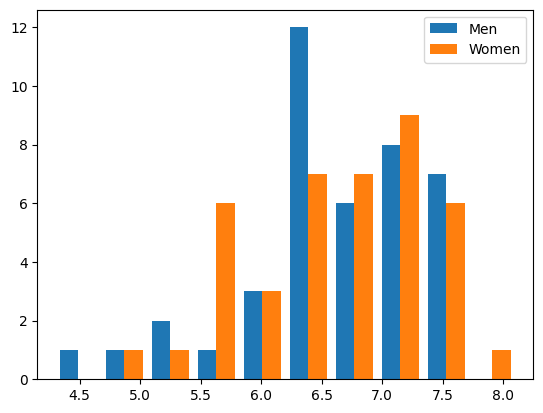

In [33]:
import matplotlib.pyplot as plt
plt.hist([reshaped.Men, reshaped.Women],label=['Men','Women'])
plt.legend()
plt.show()

In [34]:
reshaped.shape

(41, 2)

In [35]:
reshaped.mean()

Inequality
Men      6.578049
Women    6.629268
dtype: float64

We can use a paired-sample t-test to check whether this difference in means is significant. (using $\alpha = 0.05$)

In [36]:
from scipy.stats import ttest_rel
ttest_rel(reshaped.Men,reshaped.Women)

TtestResult(statistic=np.float64(-1.004681192451847), pvalue=np.float64(0.321089650106405), df=np.int64(40))

$p > \alpha$: Overall, there does not appear to be any evidence that men and women report significantly different life satisfaction.

---
### Task 2
Is life satisfaction related to geographical latitude?

We have some information on the overall 'life satisfaction' of each country:

In [37]:
life_sat = bli.query("Indicator == 'Life satisfaction' and Inequality == 'Total'")
life_sat

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
1676,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1
1677,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2
1678,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8
1679,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0
1680,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9
1681,DNK,Denmark,SW_LIFS,Life satisfaction,Total,AVSCORE,7.5
1682,FIN,Finland,SW_LIFS,Life satisfaction,Total,AVSCORE,7.9
1683,FRA,France,SW_LIFS,Life satisfaction,Total,AVSCORE,6.7
1684,DEU,Germany,SW_LIFS,Life satisfaction,Total,AVSCORE,7.3
1685,GRC,Greece,SW_LIFS,Life satisfaction,Total,AVSCORE,5.8


We also have some information about the latitude of each country (in the *countries* table). 

In [38]:
countries = pd.read_excel("../data_geographies_v1.xlsx", 
                          sheet_name = "list-of-countries-etc")
countries.head()                        

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


Can we combine these somehow to answer this question?

How do we work with data that are held in two different DataFrames? It will be tricky at the moment, but fortunately pandas has some more tools to help us!

### Joining tables

We will start with the *life_sat* DataFrame (the "left-hand" table) and add the 'Latitude' column from *countries*. To do this, we need to `join()` the two tables together.

Importantly, we **cannot** assume that the countries are listed in the same order, or even that both tables contain the same set of countries. We need to identify a *key*, that is, some information that exists in both tables, that we can use to "look up" the correct row from *countries* (the "right-hand" table).

For our current task, the key is simply the country name.
We make these columns the index of both the left and right tables:

In [39]:
left = life_sat.copy()
left['geo'] = left['LOCATION'].str.lower()
left = left.set_index('geo')
left.head()

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
geo,,,,,,,
aus,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1
aut,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2
bel,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8
can,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0
cze,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9


In [40]:
right = countries.set_index('geo')
right = right[['Latitude']]  # to keep only the Latitude column
right.head()

,Latitude
geo,
afg,33.00000
alb,41.00000
dza,28.00000
and,42.50779
ago,-12.50000


Now we can join them with the `join()` method!

In [41]:
joined = left.join(right)
joined

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value,Latitude
geo,,,,,,,,
aus,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1,-25.00000
aut,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2,47.33333
bel,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8,50.75000
can,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0,60.10867
cze,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9,49.75000
dnk,DNK,Denmark,SW_LIFS,Life satisfaction,Total,AVSCORE,7.5,56.00000
fin,FIN,Finland,SW_LIFS,Life satisfaction,Total,AVSCORE,7.9,64.00000
fra,FRA,France,SW_LIFS,Life satisfaction,Total,AVSCORE,6.7,46.00000
deu,DEU,Germany,SW_LIFS,Life satisfaction,Total,AVSCORE,7.3,51.50000


`join()` is just one of several pandas methods for working with **relational data** (i.e. data held in more than one table).

You can move the the current index column back into the body of the DataFrame using the method [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index)


In [42]:
data = joined.reset_index()
data.head()

,geo,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value,Latitude
0,aus,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1,-25.00000
1,aut,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2,47.33333
2,bel,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8,50.75000
3,can,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0,60.10867
4,cze,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9,49.75000


Use the resulting table to investigate the relationship between life satisfaction and latitude.

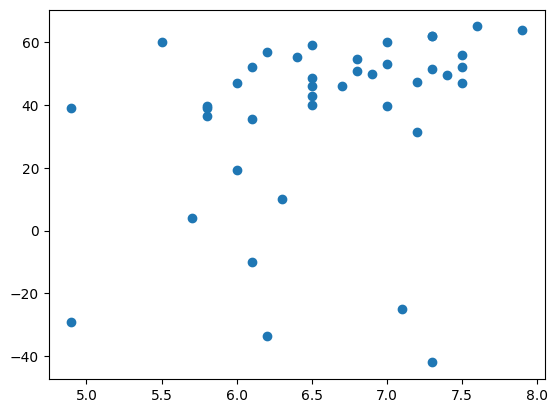

In [43]:
import numpy as np
plt.scatter(data['Value'],data['Latitude'])
plt.show()

The shape of the data looks interesting. What if we take the absolute value of Latitude using `np.abs()`?

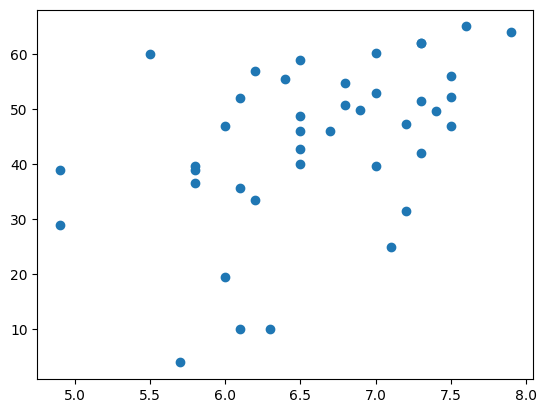

In [44]:
import numpy as np
plt.scatter(data['Value'],np.abs(data['Latitude']))
plt.show()

It looks like there is a positive correlation between abs(Latitude) and life satisfaction. We can check this with Pearson's $r$. Remember that the function also reports a p-value:

In [45]:
from scipy.stats import pearsonr
r, pval = pearsonr(data['Value'],np.abs(data['Latitude']))
print("r =",r)
print("pval =",pval)

r = 0.4674563331398759
pval = 0.002059332251062299


The correlation looks significant at a significance level of $\alpha=0.05$.

### Question: 
What is the origin of this correlation?

Of course, there are many factors that we have not yet considered. If we look carefully at the scatter plot, the correlation is mostly caused by the points where abs(Latitude) < 30 degrees:

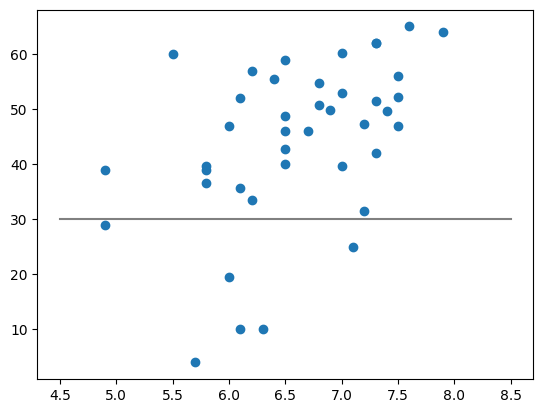

In [46]:
plt.scatter(data['Value'],np.abs(data['Latitude']))
plt.plot([4.5,8.5],[30,30], c='gray')
plt.show()

Which countries have abs(Latitude) < 30 degrees?

In [47]:
data.query("Latitude > -30 and Latitude < 30")['Country']

0        Australia
17          Mexico
30          Brazil
37    South Africa
38        Colombia
40      Costa Rica
Name: Country, dtype: object

We might propose a hypothesis that being formerly colonised by a European country (rather than e.g. amount of sunshine) is associated with lower life satisfaction.

Since we have derived this hypothesis **after** looking at the data, we cannot test it on the same data set. But there are lots of other countries that are not in our current table, so it would still be possible to test this idea on another data set. 